In [3]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import nltk
import os

# Configurar número de núcleos para evitar o aviso do Joblib
os.environ["LOKY_MAX_CPU_COUNT"] = "4"

# Baixar stopwords do NLTK
nltk.download('stopwords')
stop_words = stopwords.words('portuguese')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [6]:
# Carregar o dataset
dataset_path = "/content/myntra_products_catalog.csv"  # Ajuste o caminho conforme necessário
df = pd.read_csv(dataset_path)

# Exibir as primeiras linhas para confirmar o carregamento
print(df.head())

# Preencher valores ausentes na coluna 'Description'
df['Description'] = df['Description'].fillna("")


   ProductID                                        ProductName ProductBrand  \
0   10017413  DKNY Unisex Black & Grey Printed Medium Trolle...         DKNY   
1   10016283  EthnoVogue Women Beige & Grey Made to Measure ...   EthnoVogue   
2   10009781  SPYKAR Women Pink Alexa Super Skinny Fit High-...       SPYKAR   
3   10015921  Raymond Men Blue Self-Design Single-Breasted B...      Raymond   
4   10017833  Parx Men Brown & Off-White Slim Fit Printed Ca...         Parx   

   Gender  Price (INR)  NumImages  \
0  Unisex        11745          7   
1   Women         5810          7   
2   Women          899          7   
3     Men         5599          5   
4     Men          759          5   

                                         Description PrimaryColor  
0  Black and grey printed medium trolley bag, sec...        Black  
1  Beige & Grey made to measure kurta with churid...        Beige  
2  Pink coloured wash 5-pocket high-rise cropped ...         Pink  
3  Blue self-design band

In [7]:
# Aplicar TF-IDF na coluna 'Description'
tfidf = TfidfVectorizer(stop_words=stop_words, max_features=1000)  # Limite de 1000 features
tfidf_matrix = tfidf.fit_transform(df['Description'])

# Converter a matriz TF-IDF em um DataFrame para visualização
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())
print(tfidf_df.head())


   100   24   30  360  3xsofter   50   60  about  above  absorbent  ...  \
0  0.0  0.0  0.0  0.0       0.0  0.0  0.0    0.0    0.0        0.0  ...   
1  0.0  0.0  0.0  0.0       0.0  0.0  0.0    0.0    0.0        0.0  ...   
2  0.0  0.0  0.0  0.0       0.0  0.0  0.0    0.0    0.0        0.0  ...   
3  0.0  0.0  0.0  0.0       0.0  0.0  0.0    0.0    0.0        0.0  ...   
4  0.0  0.0  0.0  0.0       0.0  0.0  0.0    0.0    0.0        0.0  ...   

   yearwarranty  yellow  yeswarranty  yet  yoke  you      your  zari  \
0           0.0     0.0          0.0  0.0   0.0  0.0  0.000000   0.0   
1           0.0     0.0          0.0  0.0   0.0  0.0  0.238567   0.0   
2           0.0     0.0          0.0  0.0   0.0  0.0  0.000000   0.0   
3           0.0     0.0          0.0  0.0   0.0  0.0  0.000000   0.0   
4           0.0     0.0          0.0  0.0   0.0  0.0  0.000000   0.0   

        zip  zoom  
0  0.259415   0.0  
1  0.029492   0.0  
2  0.178875   0.0  
3  0.096729   0.0  
4  0.000000   0.

In [8]:
# Aplicar K-Means com 5 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster_Description'] = kmeans.fit_predict(tfidf_matrix)

# Visualizar as primeiras linhas com os clusters atribuídos
print(df[['Description', 'Cluster_Description']].head())


                                         Description  Cluster_Description
0  Black and grey printed medium trolley bag, sec...                    2
1  Beige & Grey made to measure kurta with churid...                    2
2  Pink coloured wash 5-pocket high-rise cropped ...                    0
3  Blue self-design bandhgala suitBlue self-desig...                    0
4  Brown and off-white printed casual shirt, has ...                    3


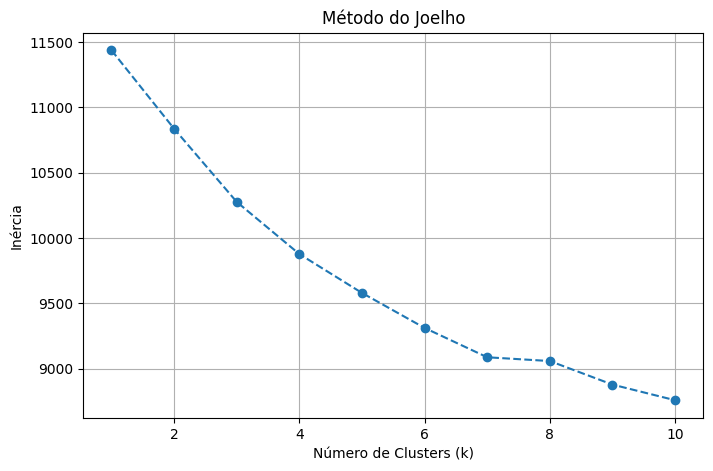

In [9]:
# Calcular inércia para diferentes valores de k
inertias = []
k_values = range(1, 11)  # Testar de 1 a 10 clusters

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(tfidf_matrix)
    inertias.append(kmeans.inertia_)

# Plotar o gráfico do método do joelho
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertias, marker='o', linestyle='--')
plt.xlabel("Número de Clusters (k)")
plt.ylabel("Inércia")
plt.title("Método do Joelho")
plt.grid(True)
plt.show()


In [10]:
df.describe()

,ProductID,Price (INR),NumImages,Cluster_Description
count,1.249100e+04,12491.000000,12491.000000,12491.000000
mean,9.917160e+06,1452.660956,4.913698,1.596349
std,1.438006e+06,2118.503976,1.092333,0.835980
min,1.012060e+05,90.000000,1.000000,0.000000
25%,1.006215e+07,649.000000,5.000000,1.000000
50%,1.015463e+07,920.000000,5.000000,2.000000
75%,1.021565e+07,1499.000000,5.000000,2.000000
max,1.027514e+07,63090.000000,10.000000,3.000000


In [11]:
df.dtypes

,0
ProductID,int64
ProductName,object
ProductBrand,object
Gender,object
Price (INR),int64
NumImages,int64
Description,object
PrimaryColor,object
Cluster_Description,int32


In [12]:
df.sample(3)

,ProductID,ProductName,ProductBrand,Gender,Price (INR),NumImages,Description,PrimaryColor,Cluster_Description
2213,10037083,Shaily Cream-Coloured & Blue Pure Silk Woven D...,Shaily,Women,1279,5,Cream-coloured and blue Banarasi woven design ...,Blue,2
2078,10062265,CHUTPUT Kids White & Blue Solid Cardigan with ...,CHUTPUT,Unisex Kids,1125,5,"White, blue and green solid cardigan with appl...",Blue,1
543,10004131,HIGHLANDER Men Blue & Black Slim Fit Printed C...,HIGHLANDER,Men,699,5,"Blue and black printed casual shirt, has a spr...",Blue,3


In [13]:
df.to_csv('clustered_products.csv', index=False , header=True)